In [1]:
#Importar les llibreries que podem fer servir
#Com tinc més d'un dataset creem una funció per carregar csvs

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
from matplotlib import pyplot as plt
from numpy import mean
from numpy import std
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, precision_recall_curve, \
    average_precision_score, roc_curve, auc
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
import time


def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

In [3]:
#Carrego els dataset i poso els mateixs noms a les columnes

In [4]:
dataset_rock = load_dataset('./Data/0.csv')
dataset_rock.columns = [
"reading 1 sensor 1", "reading 1 sensor 2","reading 1 sensor 3","reading 1 sensor 4","reading 1 sensor 5","reading 1 sensor 6","reading 1 sensor 7", "reading 1 sensor 8",
"reading 2 sensor 1", "reading 2 sensor 2","reading 2 sensor 3","reading 2 sensor 4","reading 2 sensor 5","reading 2 sensor 6","reading 2 sensor 7", "reading 2 sensor 8",
"reading 3 sensor 1", "reading 3 sensor 2","reading 3 sensor 3","reading 3 sensor 4","reading 3 sensor 5","reading 3 sensor 6","reading 3 sensor 7", "reading 3 sensor 8",
"reading 4 sensor 1", "reading 4 sensor 2","reading 4 sensor 3","reading 4 sensor 4","reading 4 sensor 5","reading 4 sensor 6","reading 4 sensor 7", "reading 4 sensor 8",
"reading 5 sensor 1", "reading 5 sensor 2","reading 5 sensor 3","reading 5 sensor 4","reading 5 sensor 5","reading 5 sensor 6","reading 5 sensor 7", "reading 5 sensor 8",
"reading 6 sensor 1", "reading 6 sensor 2","reading 6 sensor 3","reading 6 sensor 4","reading 6 sensor 5","reading 6 sensor 6","reading 6 sensor 7", "reading 6 sensor 8",
"reading 7 sensor 1", "reading 7 sensor 2","reading 7 sensor 3","reading 7 sensor 4","reading 7 sensor 5","reading 7 sensor 6","reading 7 sensor 7", "reading 7 sensor 8",
"reading 8 sensor 1", "reading 8 sensor 2","reading 8 sensor 3","reading 8 sensor 4","reading 8 sensor 5","reading 8 sensor 6","reading 8 sensor 7", "reading 8 sensor 8",
"result"]
dataset_scissors = load_dataset('./Data/1.csv')
dataset_scissors.columns = [
"reading 1 sensor 1", "reading 1 sensor 2","reading 1 sensor 3","reading 1 sensor 4","reading 1 sensor 5","reading 1 sensor 6","reading 1 sensor 7", "reading 1 sensor 8",
"reading 2 sensor 1", "reading 2 sensor 2","reading 2 sensor 3","reading 2 sensor 4","reading 2 sensor 5","reading 2 sensor 6","reading 2 sensor 7", "reading 2 sensor 8",
"reading 3 sensor 1", "reading 3 sensor 2","reading 3 sensor 3","reading 3 sensor 4","reading 3 sensor 5","reading 3 sensor 6","reading 3 sensor 7", "reading 3 sensor 8",
"reading 4 sensor 1", "reading 4 sensor 2","reading 4 sensor 3","reading 4 sensor 4","reading 4 sensor 5","reading 4 sensor 6","reading 4 sensor 7", "reading 4 sensor 8",
"reading 5 sensor 1", "reading 5 sensor 2","reading 5 sensor 3","reading 5 sensor 4","reading 5 sensor 5","reading 5 sensor 6","reading 5 sensor 7", "reading 5 sensor 8",
"reading 6 sensor 1", "reading 6 sensor 2","reading 6 sensor 3","reading 6 sensor 4","reading 6 sensor 5","reading 6 sensor 6","reading 6 sensor 7", "reading 6 sensor 8",
"reading 7 sensor 1", "reading 7 sensor 2","reading 7 sensor 3","reading 7 sensor 4","reading 7 sensor 5","reading 7 sensor 6","reading 7 sensor 7", "reading 7 sensor 8",
"reading 8 sensor 1", "reading 8 sensor 2","reading 8 sensor 3","reading 8 sensor 4","reading 8 sensor 5","reading 8 sensor 6","reading 8 sensor 7", "reading 8 sensor 8",
"result"]
dataset_paper = load_dataset('./Data/2.csv')
dataset_paper.columns = [
"reading 1 sensor 1", "reading 1 sensor 2","reading 1 sensor 3","reading 1 sensor 4","reading 1 sensor 5","reading 1 sensor 6","reading 1 sensor 7", "reading 1 sensor 8",
"reading 2 sensor 1", "reading 2 sensor 2","reading 2 sensor 3","reading 2 sensor 4","reading 2 sensor 5","reading 2 sensor 6","reading 2 sensor 7", "reading 2 sensor 8",
"reading 3 sensor 1", "reading 3 sensor 2","reading 3 sensor 3","reading 3 sensor 4","reading 3 sensor 5","reading 3 sensor 6","reading 3 sensor 7", "reading 3 sensor 8",
"reading 4 sensor 1", "reading 4 sensor 2","reading 4 sensor 3","reading 4 sensor 4","reading 4 sensor 5","reading 4 sensor 6","reading 4 sensor 7", "reading 4 sensor 8",
"reading 5 sensor 1", "reading 5 sensor 2","reading 5 sensor 3","reading 5 sensor 4","reading 5 sensor 5","reading 5 sensor 6","reading 5 sensor 7", "reading 5 sensor 8",
"reading 6 sensor 1", "reading 6 sensor 2","reading 6 sensor 3","reading 6 sensor 4","reading 6 sensor 5","reading 6 sensor 6","reading 6 sensor 7", "reading 6 sensor 8",
"reading 7 sensor 1", "reading 7 sensor 2","reading 7 sensor 3","reading 7 sensor 4","reading 7 sensor 5","reading 7 sensor 6","reading 7 sensor 7", "reading 7 sensor 8",
"reading 8 sensor 1", "reading 8 sensor 2","reading 8 sensor 3","reading 8 sensor 4","reading 8 sensor 5","reading 8 sensor 6","reading 8 sensor 7", "reading 8 sensor 8",
"result"]
dataset_ok = load_dataset('./Data/3.csv')
dataset_ok.columns = [
"reading 1 sensor 1", "reading 1 sensor 2","reading 1 sensor 3","reading 1 sensor 4","reading 1 sensor 5","reading 1 sensor 6","reading 1 sensor 7", "reading 1 sensor 8",
"reading 2 sensor 1", "reading 2 sensor 2","reading 2 sensor 3","reading 2 sensor 4","reading 2 sensor 5","reading 2 sensor 6","reading 2 sensor 7", "reading 2 sensor 8",
"reading 3 sensor 1", "reading 3 sensor 2","reading 3 sensor 3","reading 3 sensor 4","reading 3 sensor 5","reading 3 sensor 6","reading 3 sensor 7", "reading 3 sensor 8",
"reading 4 sensor 1", "reading 4 sensor 2","reading 4 sensor 3","reading 4 sensor 4","reading 4 sensor 5","reading 4 sensor 6","reading 4 sensor 7", "reading 4 sensor 8",
"reading 5 sensor 1", "reading 5 sensor 2","reading 5 sensor 3","reading 5 sensor 4","reading 5 sensor 5","reading 5 sensor 6","reading 5 sensor 7", "reading 5 sensor 8",
"reading 6 sensor 1", "reading 6 sensor 2","reading 6 sensor 3","reading 6 sensor 4","reading 6 sensor 5","reading 6 sensor 6","reading 6 sensor 7", "reading 6 sensor 8",
"reading 7 sensor 1", "reading 7 sensor 2","reading 7 sensor 3","reading 7 sensor 4","reading 7 sensor 5","reading 7 sensor 6","reading 7 sensor 7", "reading 7 sensor 8",
"reading 8 sensor 1", "reading 8 sensor 2","reading 8 sensor 3","reading 8 sensor 4","reading 8 sensor 5","reading 8 sensor 6","reading 8 sensor 7", "reading 8 sensor 8",
"result"]

In [5]:
#Junto els dataset per poder fer la classificació amb tots els resultats
#Si s'entrena només amb un tipus pot provocar overfitting

In [6]:
dataset = dataset_rock.append(dataset_scissors)
dataset = dataset.append(dataset_paper)
dataset = dataset.append(dataset_ok)

In [7]:
#Miro la dimensionalitat de les dades, si hi ha valors nulls

In [8]:
print("Dimensionalitat de la BBDD de Roca:", dataset_rock.shape)
print("Dimensionalitat de la BBDD de Tissores:", dataset_scissors.shape)
print("Dimensionalitat de la BBDD de Paper:", dataset_paper.shape)
print("Dimensionalitat de la BBDD de Ok:", dataset_ok.shape)
print("Dimensionalitat de la BBDD:", dataset.shape)

Dimensionalitat de la BBDD de Roca: (2909, 65)
Dimensionalitat de la BBDD de Tissores: (2902, 65)
Dimensionalitat de la BBDD de Paper: (2942, 65)
Dimensionalitat de la BBDD de Ok: (2921, 65)
Dimensionalitat de la BBDD: (11674, 65)


In [9]:
print(dataset.isnull().values.any())
print(dataset.isnull().sum().sum())

False
0


In [10]:
#No tenim valors nulls
#Miro la mitjana i la desviació estàndard

In [11]:
data_mean, data_std = mean(dataset.values), std(dataset.values)
print(data_mean, data_std)

-0.6492652969781632 17.2376411975259


In [12]:
#Al tenir una desviació estandard tan baixa, no crec que calgui buscar i borrar outliers
#Realment aquests poden ajudar a diferenciar els resultats
#Probem a classificar amb LogisticRegresison

In [13]:
data = dataset.values

x = data[:, :64]
y = data[:, 64]

print(x)
print(y)

particions = [0.3,0.5, 0.7, 0.8]
kernel_lst = ['linear', 'poly', 'rbf', 'sigmoid']

for kern in kernel_lst:
    inici = time.time()
    print("---------- KERNEL:", kern, " ---------- ")
    for part in particions:
        x_t, x_v, y_t, y_v = train_test_split(x, y, train_size=part)
        
        logireg = LogisticRegression(C=1.0, fit_intercept=True, penalty='l2', max_iter=1000)
        logireg.fit(x_t, y_t)

        print("Correct classification Logistic ", part, "% of the data: ", logireg.score(x_v, y_v))
        fi = time.time()
        total = fi - inici
        print("Ha tardat: ", total, " segons")
plt.show()


[[-47.  -6.  -5. ...  21. 111.  15.]
 [-19.  -8.  -8. ...  21. 114.  48.]
 [  2.   3.   0. ...  39. 119.  43.]
 ...
 [ -1.  -3.  -1. ... -29.  -5.   0.]
 [  1.   4.   4. ... -90.   3.   5.]
 [ -2.   4.   2. ...  64.  11.   5.]]
[0. 0. 0. ... 3. 3. 3.]
---------- KERNEL: linear  ---------- 
Correct classification Logistic  0.3 % of the data:  0.3458149779735683
Ha tardat:  0.5670034885406494  segons
Correct classification Logistic  0.5 % of the data:  0.3328764776426246
Ha tardat:  1.7509970664978027  segons
Correct classification Logistic  0.7 % of the data:  0.35341136168998
Ha tardat:  3.4149999618530273  segons
Correct classification Logistic  0.8 % of the data:  0.36231263383297646
Ha tardat:  5.452000617980957  segons
---------- KERNEL: poly  ---------- 
Correct classification Logistic  0.3 % of the data:  0.3504650024473813
Ha tardat:  0.430999755859375  segons
Correct classification Logistic  0.5 % of the data:  0.33510364913482954
Ha tardat:  1.402998447418213  segons
Correct c

In [14]:
#Decision tree

Decision tree
Mean accuracy with  0.3 % of the data:  0.7632
Ha tardat:  4.623005151748657  segons
Mean accuracy with  0.5 % of the data:  0.7677
Ha tardat:  3.371018409729004  segons
Mean accuracy with  0.7 % of the data:  0.7365
Ha tardat:  2.130063056945801  segons
Mean accuracy with  0.8 % of the data:  0.7438
Ha tardat:  1.4540605545043945  segons


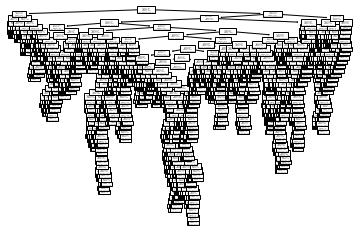

In [15]:
print("Decision tree")
for part in particions:
    inici = time.time()
    x_t, x_v, y_t, y_v = train_test_split(x, y, train_size=part)
    clf = DecisionTreeClassifier(random_state=0)
    clf.fit(x_t, y_t)
    cv = cross_val_score(clf, x_v, y_v, cv=10)
    total = 0
    for v in cv:
        total += v
    print("Mean accuracy with ", part, "% of the data: ", round(total/10, 4))
    fi = time.time()
    total = fi - inici
    print("Ha tardat: ", total, " segons")
    plot_tree(clf)
probs = clf.predict_proba(x_v)

In [16]:
#Mirem Precision-Recall and ROC curve

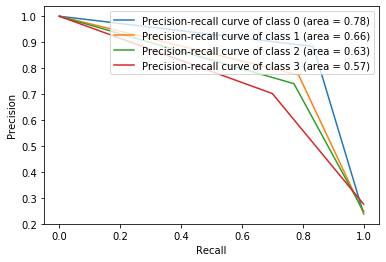

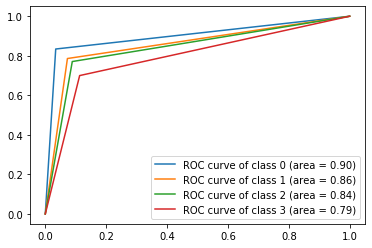

In [17]:
total_classes = 4
precision = {}
recall = {}
average_precision = {}
plt.figure()
for i in range(total_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_v == i, probs[:, i])
    average_precision[i] = average_precision_score(y_v == i, probs[:, i])

    plt.plot(recall[i], precision[i],
             label='Precision-recall curve of class {0} (area = {1:0.2f})'
                   ''.format(i, average_precision[i]))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc="upper right")

fpr = {}
tpr = {}
roc_auc = {}
for i in range(total_classes):
    fpr[i], tpr[i], _ = roc_curve(y_v == i, probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
for i in range(total_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})' ''.format(i, roc_auc[i]))
plt.legend()

In [18]:
#Crec que classifica millor la classe de roca ja que és el gest més diferent
#Per això també crec que li costa més tissora, ja que és el gest més semblant a la resta.
#KNN

In [19]:
print("KNN")

x_t, x_v, y_t, y_v = train_test_split(x, y, train_size=0.7)

neigh_array = range(1, 10)

for n in neigh_array:
    inici = time.time()
    print("---------- num neighbors = ", n, " ---------- ");

    model = KNeighborsClassifier(n_neighbors=n)

    model.fit(x_t,y_t)

    predictions = model.predict(x_t)

    acc = accuracy_score(y_t, predictions)
    prec = precision_score(y_t, predictions, average='micro')
    rec = recall_score(y_t, predictions, average='micro')
    conf_mat = confusion_matrix(y_t, predictions).T
    fi = time.time()
    total = fi - inici
    print(f'Accuracy:{acc}')
    print(f'Precision:{prec}')
    print(f'Recall:{rec}')
    print("Ha tardat: ", total, " segons")

KNN
---------- num neighbors =  1  ---------- 
Accuracy:1.0
Precision:1.0
Recall:1.0
Ha tardat:  0.5989425182342529  segons
---------- num neighbors =  2  ---------- 
Accuracy:0.8437155794884347
Precision:0.8437155794884347
Recall:0.8437155794884347
Ha tardat:  9.835068702697754  segons
---------- num neighbors =  3  ---------- 
Accuracy:0.7871741524905153
Precision:0.7871741524905153
Recall:0.7871741524905153
Ha tardat:  10.020931720733643  segons
---------- num neighbors =  4  ---------- 
Accuracy:0.7770162770774691
Precision:0.7770162770774691
Recall:0.7770162770774691
Ha tardat:  10.198001623153687  segons
---------- num neighbors =  5  ---------- 
Accuracy:0.7620854240607025
Precision:0.7620854240607025
Recall:0.7620854240607025
Ha tardat:  10.678994178771973  segons
---------- num neighbors =  6  ---------- 
Accuracy:0.7400562966589157
Precision:0.7400562966589157
Recall:0.7400562966589157
Ha tardat:  10.53900146484375  segons
---------- num neighbors =  7  ---------- 
Accuracy:0

In [20]:
#Resultats molt semblants o pijtors al decission-tree, ens quedem decission-tree com a millor model